# Income & Sin  

Eitan Adler, Joshua Bienstock & Michael Jaroslawicz

## Overview

We chose to analyze the relationship between "Income" and "Sin" across the U.S by using data broken down by county. We sought to investigate whether a relationship existed between three different economic indicators (income, unemployment, and income inequality) and a variety of behavior related health outcomes (adult obesity, adult smoking, drug overdose deaths, excessive drinking, alcohol impaired driving deaths, sexually transmitted infections, and physical inactivity). We were also interested in whether significant differences existed in the relationships between the various economic indicators and the health indicators.  Though our analysis does not directly address causality, analyzing these relationship might inform policy prescriptions for alleviating these negative health outcomes.  


### Data Sources

We use data from Data USA for the year 2015. The data source has a wealth of data and our criterion for choosing which data to use were data/variables that could be broken down by county and would fit with our theme. We used 2015 data because it was the most year for which data was available for all of our variables.  The variables we chose to use do not conform to a single mode of measurement and we've therefore provided a list below of our variables and what they measure. 

#### Variables:
   #### "Income"
     Income: Median household income.
     Income inequality: The ratio of household income at the 80th percentile to that at the 20th percentile.
     Unemployment: The percentage of civilian labor force, age 16 and older, that is unemployed but seeking work.
   
   #### "Sin" 
     Adult Obesity: The percentage of adults that report a BMI greater than or equal to 30.
     Physical inactivity: The percentage of adults aged 20 and over reporting no leisure-time physical activity.
     Adult Smoking: The percentage of adults that reported currently smoking.
     Excessive drinking: The percentage of adults that report excessive drinking.
     Alcohol impaired driving deaths: The percentage of driving deaths with alcohol involvement.
     Sexually transmitted infections: Number of persons living with an HIV infection per 100,000 population.
     Drug overdose deaths: Number of drgu overdose deaths per 100,000 population.

### Methodology: 

After indexing our dataframes using the unique county marker, "geo", that our data set provided, we merged our two dataframes along that marker. We then manipulated the data to code inputs of "None" as blank inputs and to convert the data from string values to floating numbers. Once we were satisfied with our dataframe, we ran correlations and regressions of our "Sin" variables with our "Income" variables. 

### Findings
Our hypothesis was that there would be a negative correlation between income and all categories of "Sin" and a positive relationship between unemployment/income inequality and all categories of "Sin."

In general, our analysis supported our hypothesis.  One notable exception was excessive drinking, which was positively correlated with income.  More detailed review and explanation of our analyses are included below.


## Importing Packages

In [1]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt        # pyplot module
import statsmodels.api as sm           # Statsmodel module
import datetime as dt                  # date and time module
import numpy as np
import seaborn as sns

%matplotlib inline                     


# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())

C:\Users\eitan\Anaconda3.1\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Python version: 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Pandas version:  0.20.3
Matplotlib version:  2.1.0
Today:  2017-12-20


## Data Input

#### We downloaded our data directly to this jupyter notebook using DataUSA's API.  We downloaded the data into two seperate dataframes.  The first dataframe contains data whose original source is the American Community Survey (ACS).  The second dataframe includes data from County Health Rankings (CHR).  

In [2]:
df_datausa1 = pd.read_csv("https://university-api.datausa.io/api/csv?show=geo&year=2015&sumlevel=county&required=pop,income,income_moe")
df_datausa1

,year,geo_name,geo,pop,income,income_moe
0,2015,Autauga County,05000US01001,55221,51281.0,2391.0
1,2015,"Baldwin County, AL",05000US01003,195121,50254.0,1263.0
2,2015,Barbour County,05000US01005,26932,32964.0,2973.0
3,2015,Bibb County,05000US01007,22604,38678.0,3995.0
4,2015,Blount County,05000US01009,57710,45813.0,3141.0
5,2015,Bullock County,05000US01011,10678,31938.0,5884.0
6,2015,Butler County,05000US01013,20354,32229.0,1793.0
7,2015,"Calhoun County, AL",05000US01015,116648,41703.0,925.0
8,2015,Chambers County,05000US01017,34079,34177.0,2949.0
9,2015,Cherokee County,05000US01019,26008,36296.0,1710.0


In [3]:
df_datausa2 = pd.read_csv("https://university-api.datausa.io/api/csv?show=geo&year=2015&sumlevel=county&required=alcoholimpaired_driving_deaths,physical_inactivity,sexually_transmitted_infections,excessive_drinking,adult_smoking,adult_obesity,drug_overdose_deaths,unemployment,income_inequality")
df_datausa2 #this dataframe contains fewer rows than our df_datausa1 because it does not contain data for Puerto Rico.

,year,geo_name,geo,alcoholimpaired_driving_deaths,physical_inactivity,sexually_transmitted_infections,excessive_drinking,adult_smoking,adult_obesity,drug_overdose_deaths,unemployment,income_inequality
0,2015,Autauga County,05000US01001,0.333,0.279,508.0,0.167,0.217,0.313,8.23,0.057,4.172
1,2015,"Baldwin County, AL",05000US01003,0.303,0.252,357.5,0.179,0.206,0.250,15.29,0.058,4.417
2,2015,Barbour County,05000US01005,0.435,0.323,716.9,0.135,0.251,0.384,None,0.1,5.474
3,2015,Bibb County,05000US01007,0.31,0.332,371.7,0.112,0.259,0.373,18.93,0.068,4.514
4,2015,Blount County,05000US01009,0.18,0.298,160.8,0.055,0.213,0.309,18.3,0.056,3.984
5,2015,Bullock County,05000US01011,0.417,0.328,964.3,None,0.378,0.432,None,0.12,5.263
6,2015,Butler County,05000US01013,0.217,0.373,738.7,0.109,0.305,0.384,8.94,0.093,5.100
7,2015,"Calhoun County, AL",05000US01015,0.225,0.332,684.6,0.116,0.244,0.315,12.06,0.073,5.164
8,2015,Chambers County,05000US01017,0.298,0.353,871.9,None,0.241,0.397,9.96,0.073,5.280
9,2015,Cherokee County,05000US01019,0.262,0.298,192.2,0.149,0.244,0.303,16.61,0.057,5.095


In [6]:
df_datausa2.isnull().sum().sum() #this check shows that there are no missing values in these dataframes

0

#### We set the index to "geo" (each county's unique marker) to easily merge our data along "geo".  

In [7]:
df_merge1 = df_datausa1.set_index('geo')
df_merge2 = df_datausa2.set_index('geo')

#### We then merged the two dataframes using our new index of 'geo.' By using an inner merge, our new dataframe only includes data that is included in both dataframes.  Most of the excluded rows are statistics for Puerto Rican counties which had been included in the ACS data (df_datausa1, but are excluded from the CHS data (df_datausa2).

In [8]:
df_finaldf = pd.merge(df_merge1, df_merge2, left_index = True, right_index = True, how = "inner")
df_finaldf 

,year_x,geo_name_x,pop,income,income_moe,year_y,geo_name_y,alcoholimpaired_driving_deaths,physical_inactivity,sexually_transmitted_infections,excessive_drinking,adult_smoking,adult_obesity,drug_overdose_deaths,unemployment,income_inequality
geo,,,,,,,,,,,,,,,,
05000US01001,2015,Autauga County,55221,51281.0,2391.0,2015,Autauga County,0.333,0.279,508.0,0.167,0.217,0.313,8.23,0.057,4.172
05000US01003,2015,"Baldwin County, AL",195121,50254.0,1263.0,2015,"Baldwin County, AL",0.303,0.252,357.5,0.179,0.206,0.250,15.29,0.058,4.417
05000US01005,2015,Barbour County,26932,32964.0,2973.0,2015,Barbour County,0.435,0.323,716.9,0.135,0.251,0.384,None,0.1,5.474
05000US01007,2015,Bibb County,22604,38678.0,3995.0,2015,Bibb County,0.31,0.332,371.7,0.112,0.259,0.373,18.93,0.068,4.514
05000US01009,2015,Blount County,57710,45813.0,3141.0,2015,Blount County,0.18,0.298,160.8,0.055,0.213,0.309,18.3,0.056,3.984
05000US01011,2015,Bullock County,10678,31938.0,5884.0,2015,Bullock County,0.417,0.328,964.3,None,0.378,0.432,None,0.12,5.263
05000US01013,2015,Butler County,20354,32229.0,1793.0,2015,Butler County,0.217,0.373,738.7,0.109,0.305,0.384,8.94,0.093,5.100
05000US01015,2015,"Calhoun County, AL",116648,41703.0,925.0,2015,"Calhoun County, AL",0.225,0.332,684.6,0.116,0.244,0.315,12.06,0.073,5.164
05000US01017,2015,Chambers County,34079,34177.0,2949.0,2015,Chambers County,0.298,0.353,871.9,None,0.241,0.397,9.96,0.073,5.280


## Data Cleaning

#### After successfully merging our two dataframes we noticed certain duplicate columns appeared. They were promptly removed. 
#### We also chose to rename certain columns to make the dataframe easier to read.

In [9]:
df_finaldf = df_finaldf.drop('year_y',1) 
df_finaldf = df_finaldf.drop('geo_name_y',1)
df_finaldf = df_finaldf.rename(columns={'year_x':'year', 'geo_name_x':'geo_name'})

#### Our data was now all within one dataframe, but many columns were stored as non-numeric objects.  We needed to convert these objects into a numeric data type before we could produce analysis or visuals

In [10]:
df_finaldf.dtypes

year                                 int64
geo_name                            object
pop                                  int64
income                              object
income_moe                          object
alcoholimpaired_driving_deaths      object
physical_inactivity                float64
sexually_transmitted_infections     object
excessive_drinking                  object
adult_smoking                       object
adult_obesity                      float64
drug_overdose_deaths                object
unemployment                        object
income_inequality                  float64
dtype: object

#### Before converting the non-numeric columns, we first needed to convert any missing inputs from string values of "None" to a version of None that Pandas could read and operate on.
#### In most cases where there were missing values, a county was only missing a particular data point or two.  It therefore did not merit removing the entire row and thereby reduce our sample size. In this way we were able to keep our data set robust without disrupting our ability to manipulate and form conclusions about the data.
##### However, throughout our analysis we've excluded the relationship between "Income" and alcohol impaired driving deaths because that particular varibale had a significant amount of "None" and "1" values clustered together. This led us to believe that the data for that variable was simply unreliable.

In [11]:
df_finaldf=df_finaldf.replace(to_replace=['None'], value=[None])

In [12]:
df_finaldf

,year,geo_name,pop,income,income_moe,alcoholimpaired_driving_deaths,physical_inactivity,sexually_transmitted_infections,excessive_drinking,adult_smoking,adult_obesity,drug_overdose_deaths,unemployment,income_inequality
geo,,,,,,,,,,,,,,
05000US01001,2015,Autauga County,55221,51281.0,2391.0,0.333,0.279,508.0,0.167,0.217,0.313,8.23,0.057,4.172
05000US01003,2015,"Baldwin County, AL",195121,50254.0,1263.0,0.303,0.252,357.5,0.179,0.206,0.250,15.29,0.058,4.417
05000US01005,2015,Barbour County,26932,32964.0,2973.0,0.435,0.323,716.9,0.135,0.251,0.384,None,0.1,5.474
05000US01007,2015,Bibb County,22604,38678.0,3995.0,0.31,0.332,371.7,0.112,0.259,0.373,18.93,0.068,4.514
05000US01009,2015,Blount County,57710,45813.0,3141.0,0.18,0.298,160.8,0.055,0.213,0.309,18.3,0.056,3.984
05000US01011,2015,Bullock County,10678,31938.0,5884.0,0.417,0.328,964.3,None,0.378,0.432,None,0.12,5.263
05000US01013,2015,Butler County,20354,32229.0,1793.0,0.217,0.373,738.7,0.109,0.305,0.384,8.94,0.093,5.100
05000US01015,2015,"Calhoun County, AL",116648,41703.0,925.0,0.225,0.332,684.6,0.116,0.244,0.315,12.06,0.073,5.164
05000US01017,2015,Chambers County,34079,34177.0,2949.0,0.298,0.353,871.9,None,0.241,0.397,9.96,0.073,5.280


#### We then converted all data types to floats.  We did this using a loop control structure to apply astype('float64') to all of our columns

In [13]:
changelist= df_finaldf.columns.tolist()
changelist=changelist[2:]

In [14]:
for i in changelist:
    df_finaldf[i]=df_finaldf[i].astype('float64')

In [15]:
type(df_finaldf['unemployment'][5])

numpy.float64

## Data Analysis and Visualizations

### Correlation Heatmap and Tables

We began our analysis by creating a correlation heatmap for all of our variables.  This was intended to help us visualize any major trends before we began our detailed correlation analyses.

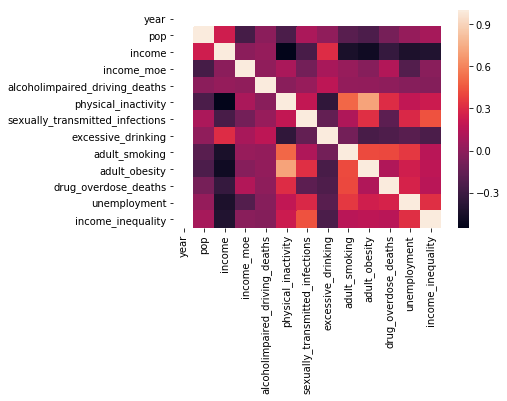

In [17]:
corr = df_finaldf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


#### We find in this heatmap that our initial hypothesis appears to be largely correct.  A negative correlation exists between income and our "Sin" variables and a positive correlation exists between unemployment and income inequality and most of our "Sin" variables. A notable exception is excessive drinking.  We now proceed to investigate these correlations more closely below.

In [18]:
#Income Correlation Table
iterationlist = df_finaldf.columns.tolist()
iterationlist = iterationlist[6:12]
income_correl_frame = pd.DataFrame(index=iterationlist, columns=['Correlation with Income'])
for i in range(0,len(iterationlist)):
    income_correl_frame['Correlation with Income'][i]=df_finaldf['income'].corr(df_finaldf[iterationlist[i]])

income_correl_frame=income_correl_frame.rename(index={'physical_inactivity': 'Phyiscal Inactivity',
                                  'sexually_transmitted_infections':'STI',
                                  'excessive_drinking':'Excessive Drinking',
                                 'adult_obesity':'Adult Obesity',
                                 'drug_overdose_deaths':'Drug Overdose Deaths',
                                'adult_smoking':'Adult Smoking'})

print(income_correl_frame)


                     Correlation with Income
Phyiscal Inactivity                -0.549736
STI                                -0.253303
Excessive Drinking                  0.311655
Adult Smoking                      -0.445199
Adult Obesity                       -0.48597
Drug Overdose Deaths               -0.330561


#### Although not entirely surprising, we see that most variables are negatievly correlated with income. Although we cannot comment on causation, it seems that climbing the income ladder may be a good way to avoid most of these detrimental vices. That is, with the exception of excessive drinking. Excessive drinking is the only "Sin" positivley correlated with Income. Again, we can not comment on causation, but the correlation is significant in and of itself.

In [19]:
#Income Correlation Table
iterationlist = df_finaldf.columns.tolist()
iterationlist = iterationlist[6:12]
income_correl_frame = pd.DataFrame(index=iterationlist, columns=['Correlation with Income Inequality'])
for i in range(0,len(iterationlist)):
    income_correl_frame['Correlation with Income Inequality'][i]=df_finaldf['income_inequality'].corr(df_finaldf[iterationlist[i]])

income_correl_frame=income_correl_frame.rename(index={'physical_inactivity': 'Phyiscal Inactivity',
                                  'sexually_transmitted_infections':'STI',
                                  'excessive_drinking':'Excessive Drinking',
                                 'adult_obesity':'Adult Obesity',
                                 'drug_overdose_deaths':'Drug Overdose Deaths',
                                'adult_smoking':'Adult Smoking'})
print(income_correl_frame)

                     Correlation with Income Inequality
Phyiscal Inactivity                            0.225446
STI                                            0.441668
Excessive Drinking                            -0.245336
Adult Smoking                                  0.153359
Adult Obesity                                  0.172365
Drug Overdose Deaths                           0.154821


#### It looks like a trend is beginning to reveal itself. With the exception of excessive drinking, as economic ills increase social ills increae as well. 
#### According to our findings regarding the relationship between "Sin" and income inequality, it seems that one way to cure the ill of excessive drinking is to create a situation of income inequality. Though we also find that with an increase in income inequality comes an increase in all of the other "Sin" variables analyzed.
#### Of particular interest might be the relationship between STI's and income inequality. All of the other correlations decrease in magnitude, while this correlation increases. This begs the question of whether there is not merely a correlation, but rather an actual causation and explanation as to why counties with higher income inequality ratios also experience increased instances of STIs. Perhaps income inequality is a condition that promotes increases in prosititution or other activities that cause sexually transmitted diseases.
#### These correlations are generally significantly weaker than those for income.  This might indicate that policies that improve people's incomes, but are not particularly progressive in terms of redistribution (such as universal basic income), might be reasonable ways to address social ills by improving economic conditions.  

In [20]:
#Income Correlation Table
iterationlist = df_finaldf.columns.tolist()
iterationlist = iterationlist[6:12]
income_correl_frame = pd.DataFrame(index=iterationlist, columns=['Correlation with Unemployment'])
for i in range(0,len(iterationlist)):
    income_correl_frame['Correlation with Unemployment'][i]=df_finaldf['unemployment'].corr(df_finaldf[iterationlist[i]])

income_correl_frame=income_correl_frame.rename(index={'physical_inactivity': 'Phyiscal Inactivity',
                                  'sexually_transmitted_infections':'STI',
                                  'excessive_drinking':'Excessive Drinking',
                                 'adult_obesity':'Adult Obesity',
                                 'drug_overdose_deaths':'Drug Overdose Deaths',
                                'adult_smoking':'Adult Smoking'})
print(income_correl_frame)

                     Correlation with Unemployment
Phyiscal Inactivity                       0.184456
STI                                       0.292824
Excessive Drinking                       -0.196862
Adult Smoking                              0.35324
Adult Obesity                             0.247985
Drug Overdose Deaths                      0.268257


#### The trend continues... positive correlation between all "Sin" variables and an economic ill, with the exception of excessive drinking, which is negatively correlated. Though, in this correlation magnitude is all over the place, with some correlations increasing and some decrasing. 
#### Based on these correlation tables we can definitively say almost nothing. But, we can speculate wildly... It seems clear that excessive drinking is negatively correlated with "Income", while all other "Sin" variables are positively correlated. The question we cannot answer is "why?". Without a causation coefficient, we are ultimately left with a "the chicken or the egg" question. Does suffering economic ills lead to the perpetration of social ills, or is a perpetrator of social ills more likely to experience economic ills due to his poor habits. 
#### Now we come to the tricky "Sin" of excessive drinking. It is negatively correlated with "Income". That we know. But why? Why is it the lone "Sin" analyzed that has such a correlation? Is it mischaracterized as a "Sin"? Is it a "Sin" for the economically advanced? Is it an instance of bad data? Again, we cannot answer these questions, we can only observe the correlation.

### Adult smoking vs. "Income" 

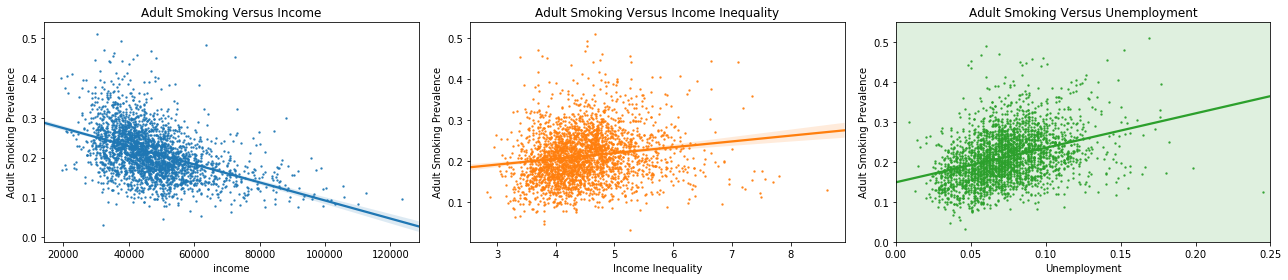

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,4), sharex=False, sharey=False)
sns.regplot(x="income",y="adult_smoking", data=df_finaldf, ax=ax1, scatter_kws={'s':2})
sns.regplot(x="income_inequality",y="adult_smoking", data=df_finaldf, ax=ax2, scatter_kws={'s':2})
sns.regplot(x="unemployment",y="adult_smoking", data=df_finaldf, ax=ax3, scatter_kws={'s':2})

ax3.set(xlim=(0,.25),ylim=(0,.55))

ax1.set_title("Adult Smoking Versus Income")
ax1.set_ylabel("Adult Smoking Prevalence")

ax2.set_title("Adult Smoking Versus Income Inequality")
ax2.set_ylabel("Adult Smoking Prevalence")
ax2.set_xlabel("Income Inequality")

ax3.set_title("Adult Smoking Versus Unemployment")
ax3.set_ylabel("Adult Smoking Prevalence")
ax3.set_xlabel("Unemployment")

plt.tight_layout()
plt.show()

#### These 3 scatter plots shed some light about the prevalence of adult smoking as it relates to "Income". We can see that there is a strong trend of the prevalence of adult smoking decreasing as income increases and that on the other side, as unemployment rises, adult smoking rises. We can also see that as income inequality becomes more of a problem, adult smoking increases. These trends are troubling, especially given how expensive a habit smoking is. This means that those with less disposable income are spending more of it on smoking as opposed to other essentials. We cannot make a judgment about whether the prevalence of adult smoking is driving these income factors, or visa versa, but what we can say is that it seems all three "Income" metrics are correlated with this social ill in a bad way.

### Physical inactivity vs. "Income" 

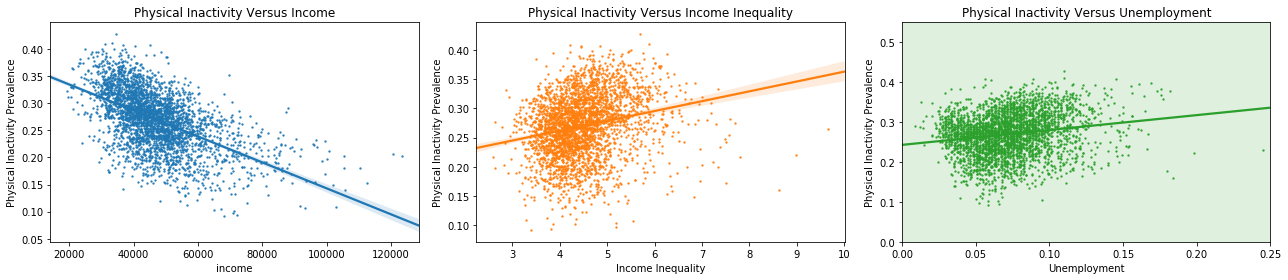

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,4), sharex=False, sharey=False)
sns.regplot(x="income",y="physical_inactivity", data=df_finaldf, ax=ax1, scatter_kws={'s':2})
sns.regplot(x="income_inequality",y="physical_inactivity", data=df_finaldf, ax=ax2, scatter_kws={'s':2})
sns.regplot(x="unemployment",y="physical_inactivity", data=df_finaldf, ax=ax3, scatter_kws={'s':2})

ax3.set(xlim=(0,.25),ylim=(0,.55))

ax1.set_title("Physical Inactivity Versus Income")
ax1.set_ylabel("Physical Inactivity Prevalence")

ax2.set_title("Physical Inactivity Versus Income Inequality")
ax2.set_ylabel("Physical Inactivity Prevalence")
ax2.set_xlabel("Income Inequality")

ax3.set_title("Physical Inactivity Versus Unemployment")
ax3.set_ylabel("Physical Inactivity Prevalence")
ax3.set_xlabel("Unemployment")

plt.tight_layout()
plt.show()

#### Prevalence of physical inactivity seems to be highly negatively correlated with income and the almost as highly positively correlated with instances of income inequality. Though it seems that physical inactivity is only slightly positively correlated with unemployment. Based on this we can suggest that as one climbs the income ladder and those situated in areas with less income inequality are more likely to be physically active, a good thing. And yet, being unemployed doesn't seem to have a great effect on this particular "Sin". It seems that across the board people are inactive and those seeking work may either be, more inclined to be inactive or simply find themselves with less of an ability to expend energy on physical activity for various reasons.

### Excessive drinking vs. "Income" 

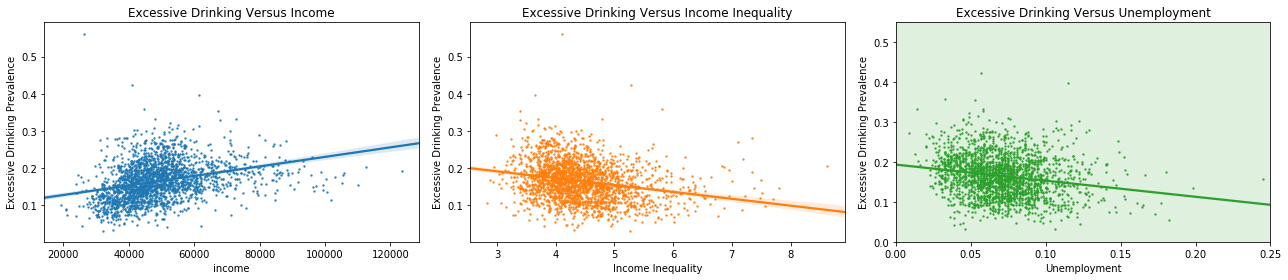

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,4), sharex=False, sharey=False)
sns.regplot(x="income",y="excessive_drinking", data=df_finaldf, ax=ax1, scatter_kws={'s':2})
sns.regplot(x="income_inequality",y="excessive_drinking", data=df_finaldf, ax=ax2, scatter_kws={'s':2})
sns.regplot(x="unemployment",y="excessive_drinking", data=df_finaldf, ax=ax3, scatter_kws={'s':2})

ax3.set(xlim=(0,.25),ylim=(0,.55))

ax1.set_title("Excessive Drinking Versus Income")
ax1.set_ylabel("Excessive Drinking Prevalence")

ax2.set_title("Excessive Drinking Versus Income Inequality")
ax2.set_ylabel("Excessive Drinking Prevalence")
ax2.set_xlabel("Income Inequality")

ax3.set_title("Excessive Drinking Versus Unemployment")
ax3.set_ylabel("Excessive Drinking Prevalence")
ax3.set_xlabel("Unemployment")

plt.tight_layout()
plt.show()

#### Excessive drinking seems to be a habit for the well off. Instances of unemployment don't seem to encourage drinking, while a higher median household income does. We think it's fair to say that excessive drinking doesn't bring about higher income, nor does it cause employment. This theory may be bolstered by the trend apparent when it comes to income inequality. Instances of higher income inequality likely means more wealthy people in the county and more wealthy people means more excessive drinking. 

### Adult obesity vs. "Income" 

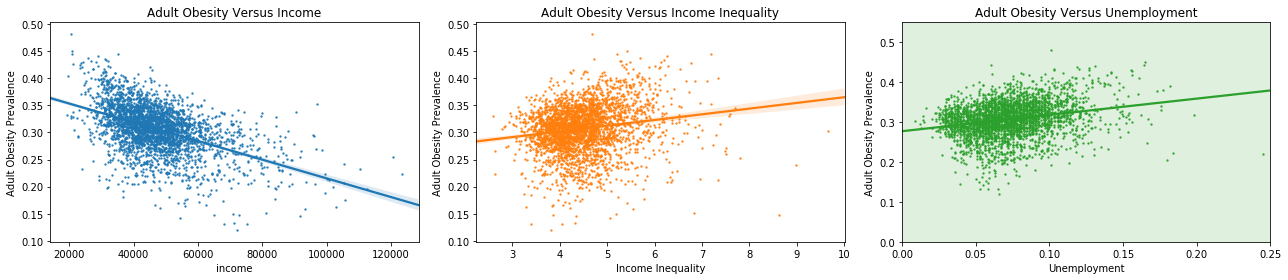

In [24]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,4), sharex=False, sharey=False)
sns.regplot(x="income",y="adult_obesity", data=df_finaldf, ax=ax1, scatter_kws={'s':2})
sns.regplot(x="income_inequality",y="adult_obesity", data=df_finaldf, ax=ax2, scatter_kws={'s':2})
sns.regplot(x="unemployment",y="adult_obesity", data=df_finaldf, ax=ax3, scatter_kws={'s':2})

ax3.set(xlim=(0,.25),ylim=(0,.55))

ax1.set_title("Adult Obesity Versus Income")
ax1.set_ylabel("Adult Obesity Prevalence")

ax2.set_title("Adult Obesity Versus Income Inequality")
ax2.set_ylabel("Adult Obesity Prevalence")
ax2.set_xlabel("Income Inequality")

ax3.set_title("Adult Obesity Versus Unemployment")
ax3.set_ylabel("Adult Obesity Prevalence")
ax3.set_xlabel("Unemployment")

plt.tight_layout()
plt.show()

#### All three metrics again seem to show that adult obesity is highly correlated with the suffering of an economic ill. Simply looking at the prices of fast food as compared to healthier options may shed light on this phenomenon. Fast food is cheaper than healthy food and those suffering an economic ill may only be able to afford cheaper more unhealthy options. Though it should be noted that adult obesity can be a cause of economic ills, as it may be harder to climb the income ladder while struggling to pull your own weight in the work force.

### STI vs. "Income" 

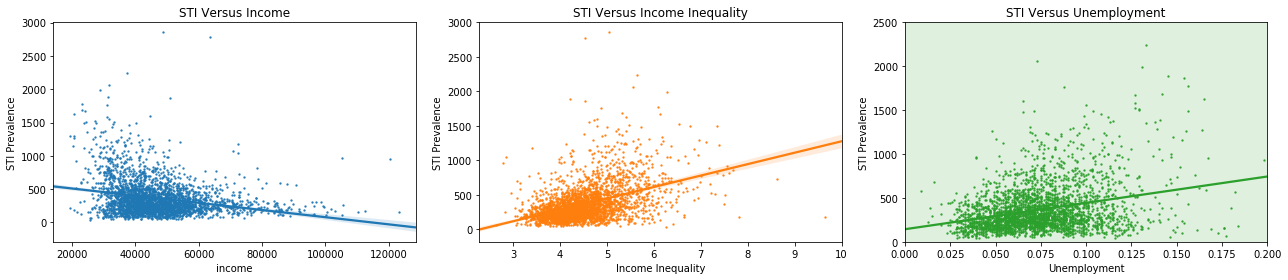

In [25]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,4), sharex=False, sharey=False)
sns.regplot(x="income",y="sexually_transmitted_infections", data=df_finaldf, ax=ax1, scatter_kws={'s':2})
sns.regplot(x="income_inequality",y="sexually_transmitted_infections", data=df_finaldf, ax=ax2, scatter_kws={'s':2})
sns.regplot(x="unemployment",y="sexually_transmitted_infections", data=df_finaldf, ax=ax3, scatter_kws={'s':2})

ax3.set(xlim=(0,.2),ylim=(0,2500))

ax1.set_title("STI Versus Income")
ax1.set_ylabel("STI Prevalence")

ax2.set_title("STI Versus Income Inequality")
ax2.set_ylabel("STI Prevalence")
ax2.set_xlabel("Income Inequality")

ax3.set_title("STI Versus Unemployment")
ax3.set_ylabel("STI Prevalence")
ax3.set_xlabel("Unemployment")

plt.tight_layout()
plt.show()

#### Prevalence of STIs seem to be highly correlated with high concentrations of unemployment. Because having an STI isn't likely to affect your work it seems that a situation of unemployment is likely the cause of this situation. Income inequality is even more highly positively correlated with STIs and this is interesting. Perhaps high numbers of unemployed individuals or high income inequality are conditions that lead to prostitution or other activities that cause a greater prevalence of STIs. We see that STIs are only slightly negatively correlated with income, meaning that your income doesn't have much of an effect on your chances of having an STI. It seems that we can posit that having an STI might have more to do with your relative place on in the economy as opposed to how much you earn.

### Drug overdose deaths vs. "Income" 

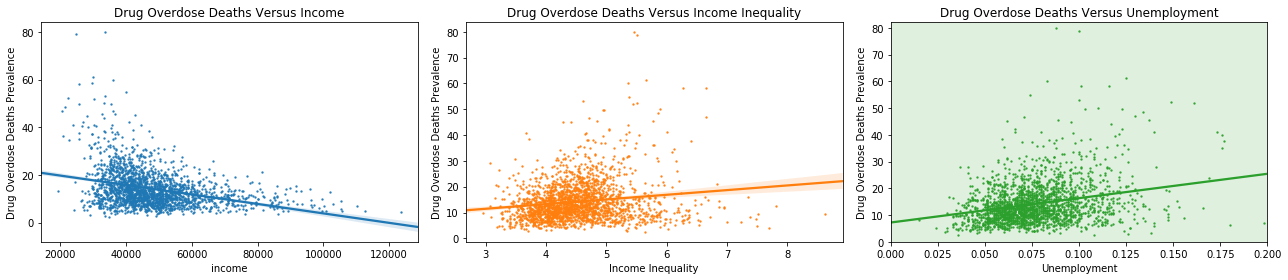

In [26]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (18,4), sharex=False, sharey=False)
sns.regplot(x="income",y="drug_overdose_deaths", data=df_finaldf, ax=ax1, scatter_kws={'s':2})
sns.regplot(x="income_inequality",y="drug_overdose_deaths", data=df_finaldf, ax=ax2, scatter_kws={'s':2})
sns.regplot(x="unemployment",y="drug_overdose_deaths", data=df_finaldf, ax=ax3, scatter_kws={'s':2})

ax3.set(xlim=(0,.2), ylim=(0,82))

ax1.set_title("Drug Overdose Deaths Versus Income")
ax1.set_ylabel("Drug Overdose Deaths Prevalence")

ax2.set_title("Drug Overdose Deaths Versus Income Inequality")
ax2.set_ylabel("Drug Overdose Deaths Prevalence")
ax2.set_xlabel("Income Inequality")

ax3.set_title("Drug Overdose Deaths Versus Unemployment")
ax3.set_ylabel("Drug Overdose Deaths Prevalence")
ax3.set_xlabel("Unemployment")

plt.tight_layout()
plt.show()

#### These correlations, across all "income." It seems that drug overdose deaths might have more to do with being unemployed and earning less than with being in a county with great income inequality. It may imply that having worse access to safer avenues of drug use may be the driving force here. And, that significant drug use may lead to situations of unemployment and a lower income. 

## Conclusion

Through this analysis we have demonstrated that there is a significant positive correlation between economic ills and social ills, with the exception of excessive drinking, which is significantly negatively correlated. We have done this by manipulating a large data set, forming a comprehensive dataframe, and creating correlation tables and scatter plots with trend lines. 

While we can not comment on the causal link between our "Income" and "Sin" variables, we can say that there is a significant correlation. This should be enough to at least start a discussion about causation. Reasonable minds can disagree about the causes, and our social behavior and the economy are not obviously linked, but it seems that they are connected and our habits and situation in one realm can have an effect on the other. 